# Exploratory_1

In this notebook I'm going to look at/ play with the data to get a better understanding of it. The main goal is to get the basic EDA out of the way and make a data_prep() method for other notebooks

## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

In [16]:
import matplotlib.pyplot as plt

In [5]:
raw_df = pd.read_csv('../data/archive/1429_1.csv')
raw_df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


## Initial EDA

In [11]:
raw_df['asins'].value_counts() #same as id

B018Y229OU               10966
B00L9EPT8O,B01E6AO69U     6619
B00U3FPN4U                5056
B00OQVZDJM                3176
B01AHB9CN2                2814
B018Y23MNM                1685
B018Y225IA                1038
B01BH83OOM                 636
B00IOY8XWQ                 580
B01J2G4VBG                 402
B00TSUGXKE                 372
B018SZT3BK                 270
B0189XYY0Q                 256
B00ZV9PXP2                 212
B01AHB9CYG                 158
B00QFQRELG                  73
B00VINDBJK                  67
B00IOYAM4I                  51
B01BFIBRIE                  30
B00QJDU3KY                  19
B002Y27P3M                  19
B01J4ORNHU                  16
B00QL1ZN3G                  15
B01AHB9C1E                  14
B00LW9XOJM                  13
B006GWO5WK                  13
B002Y27P6Y                  10
B018Y22BI4                  10
B00UH4D8G2                   8
B006GWO5NE                   8
B00X4WHP5E                   7
B018T075DC                   7
B00REQKW

In [12]:
raw_df['brand'].value_counts()

Amazon                          28701
Amazon Fire Tv                   5056
Amazon Echo                       636
Amazon Fire                       256
Amazon Digital Services Inc.       10
Amazon Coco T                       1
Name: brand, dtype: int64

In [13]:
raw_df['reviews.doRecommend'].value_counts()

True     32682
False     1384
Name: reviews.doRecommend, dtype: int64

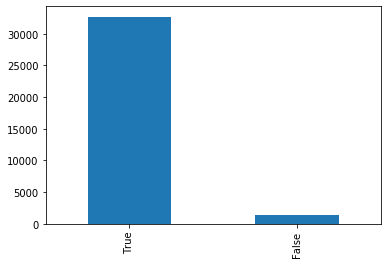

In [18]:
raw_df['reviews.doRecommend'].value_counts().plot.bar()

Well that's just a *little* lop sided

5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64


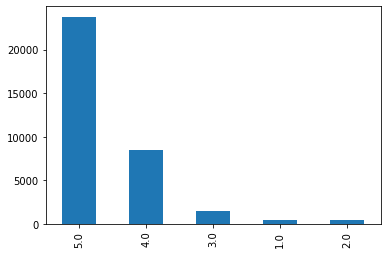

In [21]:
print(raw_df['reviews.rating'].value_counts())
raw_df['reviews.rating'].value_counts().plot.bar()

I could divide this column up as a boolean, '1' for 5 stars and '0' for less than 5 stars. While some may say that 4 an under could be considered good, most companies want to be able to net 5 stars each time, as 4 implies that there is something about the product that can be improved. 

In [6]:
print(list(raw_df.columns))

['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.userCity', 'reviews.userProvince', 'reviews.username']


In [28]:
df = raw_df[['asins', 'reviews.rating', 'reviews.doRecommend', 'reviews.title', 'reviews.text']]
df.sample(5)

,asins,reviews.rating,reviews.doRecommend,reviews.title,reviews.text
14663,B00REQKWGA,4.0,True,I liked it,I bought the Kindle Oasis for my wife as a 37t...
16157,B018Y23MNM,4.0,True,Gift for my 1 yr old neice,I bought this as a gift for my smart 1 yr old ...
30790,B00U3FPN4U,4.0,True,Good if you like movies,Good if you like movies and have prime members...
30716,B00U3FPN4U,5.0,True,Wife loves it!,Performs much better than the TV Fire Stick ge...
29510,B01BH83OOM,5.0,True,Easy small decent sound,Great little device easy to connect to bluetoo...


In [40]:
df['reviews.text'].isnull().values

TypeError: 'numpy.ndarray' object is not callable

I might want to concatinate the text of the title and the text to be their own columns. I think that it is worth investigating if just the title or just the text could better spot a bad review.

## Fun with words

In [30]:
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer 

In [31]:
sw = stopwords.words('english')

In [32]:
#from last NLP project, written with Amanda Potter 
def doc_preparer(doc, stop_words=sw):
    '''
    
    :param doc: a document from the corpus 
    :return: a document string with words which have been 
            lemmatized, 
            parsed for stopwords, 
            made lowercase,
            and stripped of punctuation and numbers.
    '''
    
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in stop_words]
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)

In [33]:
#from last NLP project, written with Amanda Potter 
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer 
  

def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

For now, the longer term plan is that I am only going to use the review text and not the title, then I will use a concatinated column of both the text and the title.